# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"]

# Get 1 year's worth of historical data for all stocks
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Display sample data
df_ticker.head()



AAPL                                       \
                             open      high      low   close    volume   
time                                                                     
2019-05-01 00:00:00-04:00  209.88  215.3100  209.230  210.52  57751414   
2019-05-02 00:00:00-04:00  209.84  212.6500  208.130  209.17  29014844   
2019-05-03 00:00:00-04:00  210.74  211.8400  210.230  211.78  17987793   
2019-05-06 00:00:00-04:00  204.29  208.8400  203.500  208.60  28949691   
2019-05-07 00:00:00-04:00  205.88  207.4175  200.825  202.86  34328425   

                              DIS                                     ...  \
                             open    high      low   close    volume  ...   
time                                                                  ...   
2019-05-01 00:00:00-04:00  137.49  138.17  136.235  136.32   7588692  ...   
2019-05-02 00:00:00-04:00  135.38  135.69  132.380  134.19  14963432  ...   
2019-05-03 00:00:00-04:00  135.22  135.31  133.780  134.28   8073628  ...   
2019-05-06 00:00:00-04:00  132.54  135.33  132.300  135.05   8946397  ...   
2019-05-07 00:00:00-04:00  135.35  135.97  132.760  133.47   9737952  ...   

                              SPY                                    WORK  \
                             open    high     low   close     volume open   
time                                                                        
2019-05-01 00:00:00-04:00  294.72  294.95  291.80  291.84   59432706  NaN   
2019-05-02 00:00:00-04:00  291.68  292.70  289.52  291.27   59209780  NaN   
2019-05-03 00:00:00-04:00  292.82  294.34  292.56  294.02   45416907  NaN   
2019-05-06 00:00:00-04:00  289.25  293.31  288.90  292.87   75426654  NaN   
2019-05-07 00:00:00-04:00  290.15  290.81  285.81  288.04  118960368  NaN   

                                                 
                          high low close volume  
time                                             
2019-05-01 00:00:00-04:00  NaN NaN   NaN    NaN  
2019-05-02 00:00:00-04:00  NaN NaN   NaN    NaN  
2019-05-03 00:00:00-04:00  NaN NaN   NaN    NaN  
2019-05-06 00:00:00-04:00  NaN NaN   NaN    NaN  
2019-05-07 00:00:00-04:00  NaN NaN   NaN    NaN  

[5 rows x 30 columns]

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
response_content_btc = response_data_btc.content
data_btc = response_data_btc.json()
print(json.dumps(data_btc, indent=4))

# Fetch current ETH price
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
print(json.dumps(data_eth, indent=4))

# Compute current value of my crpto
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18732593,
            "total_supply": 18732593,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 37289.0,
                    "volume_24h": 36358044263,
                    "market_cap": 695312172463,
                    "percentage_change_1h": -0.294384572332838,
                    "percentage_change_24h": 1.62959540301176,
                    "percentage_change_7d": -4.75560937199982,
                    "percent_change_1h": -0.294384572332838,
                    "percent_change_24h": 1.62959540301176,
                    "percent_change_7d": -4.75560937199982
                },
                "CAD": {
                    "price": 45324.7795,
                    "volume_24h": 44193202801.6765,
                   

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset( tickers, timeframe, start=today, end=today,).df
df_portfolio.index = df_portfolio.index.date

# Preview DataFrame
df_portfolio.head()

AGG                                        SPY                 \
              open      high     low   close   volume    open    high    low   
2020-10-16  117.99  118.0778  117.88  117.88  3589312  348.96  350.75  347.1   

                              
             close    volume  
2020-10-16  347.25  62467863

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [13]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value

# Consolidate financial assets data
data = {'amount':[total_crypto, total_shares_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,57241.391
shares,40938.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

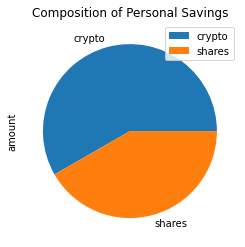

In [17]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal.")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal.")

You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                          SPY          \
              open    high      low    close     volume    open    high   
2019-05-01  108.47  108.76  108.320  108.390  4426906.0  294.72  294.95   
2019-05-02  108.33  108.33  108.100  108.165  2230918.0  291.68  292.70   
2019-05-03  108.32  108.42  108.275  108.350  2179061.0  292.82  294.34   
2019-05-06  108.56  108.57  108.440  108.460  4495020.0  289.25  293.31   
2019-05-07  108.63  108.70  108.585  108.620  2788574.0  290.15  290.81   

                                       
               low   close     volume  
2019-05-01  291.80  291.84   59432706  
2019-05-02  289.52  291.27   59209780  
2019-05-03  292.56  294.02   45416907  
2019-05-06  288.90  292.87   75426654  
2019-05-07  285.81  288.04  118960368

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [23]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                       SPY  \
              open    high      low    close     volume daily_return    open   
2019-05-01  108.47  108.76  108.320  108.390  4426906.0          NaN  294.72   
2019-05-02  108.33  108.33  108.100  108.165  2230918.0    -0.002076  291.68   
2019-05-03  108.32  108.42  108.275  108.350  2179061.0     0.001710  292.82   
2019-05-06  108.56  108.57  108.440  108.460  4495020.0     0.001015  289.25   
2019-05-07  108.63  108.70  108.585  108.620  2788574.0     0.001475  290.15   

                                                            
              high     low   close     volume daily_return  
2019-05-01  294.95  291.80  291.84   59432706          NaN  
2019-05-02  292.70  289.52  291.27   59209780    -0.001953  
2019-05-03  294.34  292.56  294.02   45416907     0.009441  
2019-05-06  293.31  288.90  292.87   75426654    -0.003911  
2019-05-07  290.81  285.81  288.04  118960368    -0.016492

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017659,1.016894,0.999466,1.013186,1.004635,0.984844,0.993981,0.991021,1.030929,0.998431,...,0.982475,0.990925,0.985016,1.027928,1.001944,1.035415,1.010915,0.988837,1.005213,0.993768
2,1.013728,1.018073,0.980157,1.008365,0.997482,0.981056,0.984088,1.010093,1.031939,0.983365,...,0.988948,1.013346,0.988348,1.033159,0.994956,1.027485,1.008148,0.954882,1.014657,0.996235
3,1.014597,1.018601,0.965613,0.998580,1.009054,0.997015,0.980981,0.998746,1.012857,0.994225,...,1.001063,1.011274,0.960117,1.047956,0.998466,1.029639,1.010388,0.928366,1.016398,0.993633
4,1.018492,1.019748,0.958556,1.006377,1.023071,1.018100,0.977852,0.991987,1.026419,1.009609,...,1.022643,1.015765,0.957883,1.025847,1.006033,1.026975,1.027698,0.922789,1.012737,1.004853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.900621,2.632944,4.001153,1.884917,1.982675,4.850228,8.868102,6.742620,3.563271,6.458550,...,4.210058,5.068899,3.403548,2.374174,1.307237,3.386615,0.914465,0.711098,38.843882,4.594667
7557,0.894619,2.694380,4.002133,1.871596,2.013976,4.847643,8.776498,6.699743,3.535903,6.348058,...,4.220375,5.215813,3.329985,2.330570,1.314898,3.329081,0.920976,0.697339,39.306777,4.622856
7558,0.908068,2.698916,3.993626,1.871004,2.018195,4.728134,8.885328,6.681766,3.548302,6.313043,...,4.263395,5.210137,3.294242,2.323453,1.336266,3.353025,0.933983,0.707047,38.999828,4.633542
7559,0.921630,2.698382,3.968011,1.873938,2.005777,4.740993,8.798505,6.753798,3.575070,6.378573,...,4.261871,5.020852,3.248793,2.303421,1.330431,3.405617,0.925663,0.716021,39.168313,4.619600


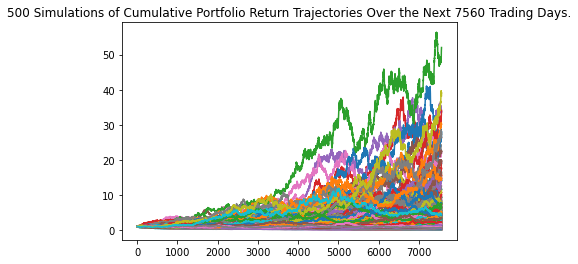

In [25]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

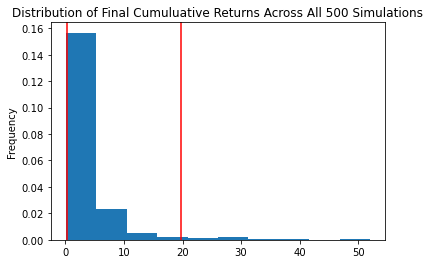

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              3.718473
std               5.426971
min               0.075255
25%               0.888170
50%               2.028676
75%               4.454496
max              52.036410
95% CI Lower      0.214335
95% CI Upper     19.659825
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $4286.7 and $393196.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $6430.05 and $589794.74


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                       SPY  \
              open    high      low    close     volume daily_return    open   
2019-05-01  108.47  108.76  108.320  108.390  4426906.0          NaN  294.72   
2019-05-02  108.33  108.33  108.100  108.165  2230918.0    -0.002076  291.68   
2019-05-03  108.32  108.42  108.275  108.350  2179061.0     0.001710  292.82   
2019-05-06  108.56  108.57  108.440  108.460  4495020.0     0.001015  289.25   
2019-05-07  108.63  108.70  108.585  108.620  2788574.0     0.001475  290.15   

                                                            
              high     low   close     volume daily_return  
2019-05-01  294.95  291.80  291.84   59432706          NaN  
2019-05-02  292.70  289.52  291.27   59209780    -0.001953  
2019-05-03  294.34  292.56  294.02   45416907     0.009441  
2019-05-06  293.31  288.90  292.87   75426654    -0.003911  
2019-05-07  290.81  285.81  288.04  118960368    -0.016492

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.977461,1.004611,0.997790,0.998293,1.000942,0.995218,0.998163,0.978181,1.023507,0.992933,...,0.998029,0.988035,1.003452,1.001481,1.014190,1.016567,0.997782,1.017583,1.003953,0.993837
2,0.972908,0.999607,0.997837,1.021571,1.031238,1.017598,1.006733,0.964271,1.028491,1.020154,...,1.008499,0.994120,0.997983,0.992587,1.028368,1.010768,0.989063,1.006100,1.011672,1.005485
3,0.977486,0.988317,0.990885,1.016853,1.044195,1.020871,1.012280,0.976981,1.021351,1.030545,...,1.003784,0.981675,1.005256,1.008623,1.039863,1.017776,0.976242,1.019538,1.034288,1.003668
4,0.958128,0.993788,0.984710,1.031751,1.046906,1.018994,1.021200,0.970167,1.007417,1.015576,...,1.037386,0.999814,1.011368,1.021338,1.048452,1.042982,0.982269,1.023222,1.030980,1.001106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.336662,0.928607,1.787958,1.488682,1.515036,1.493662,0.647727,0.576263,2.065600,1.266475,...,0.654711,0.789106,2.006407,1.192917,1.361912,1.313392,0.597034,0.906180,1.317301,1.480621
1257,1.351687,0.929138,1.779421,1.469222,1.509247,1.492044,0.645271,0.566887,2.071896,1.256286,...,0.657258,0.804308,1.994952,1.193531,1.343444,1.317915,0.583129,0.888433,1.331769,1.469794
1258,1.363482,0.937505,1.764851,1.493248,1.507114,1.530811,0.636859,0.560671,2.067931,1.233425,...,0.664138,0.776978,2.003576,1.196309,1.364404,1.320037,0.578660,0.862590,1.322535,1.456549
1259,1.356458,0.943378,1.781068,1.500492,1.547071,1.545576,0.642831,0.563622,2.059631,1.216041,...,0.670868,0.770502,2.029428,1.182357,1.377926,1.326578,0.572381,0.851992,1.317680,1.441353


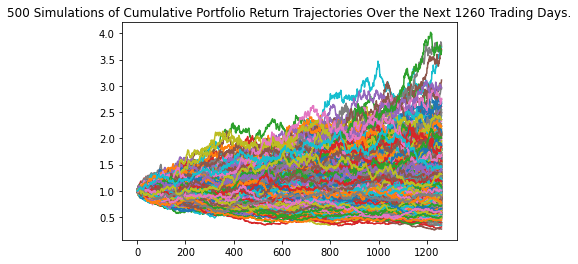

In [32]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

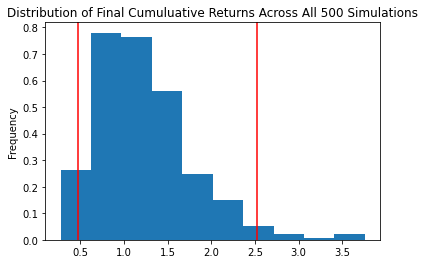

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              1.236482
std               0.551689
min               0.272961
25%               0.859353
50%               1.135798
75%               1.552117
max               3.759067
95% CI Lower      0.477290
95% CI Upper      2.523074
Name: 1260, dtype: float64


In [35]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $28637.4 and $151384.47


### Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                       SPY  \
              open    high      low    close     volume daily_return    open   
2019-05-01  108.47  108.76  108.320  108.390  4426906.0          NaN  294.72   
2019-05-02  108.33  108.33  108.100  108.165  2230918.0    -0.002076  291.68   
2019-05-03  108.32  108.42  108.275  108.350  2179061.0     0.001710  292.82   
2019-05-06  108.56  108.57  108.440  108.460  4495020.0     0.001015  289.25   
2019-05-07  108.63  108.70  108.585  108.620  2788574.0     0.001475  290.15   

                                                            
              high     low   close     volume daily_return  
2019-05-01  294.95  291.80  291.84   59432706          NaN  
2019-05-02  292.70  289.52  291.27   59209780    -0.001953  
2019-05-03  294.34  292.56  294.02   45416907     0.009441  
2019-05-06  293.31  288.90  292.87   75426654    -0.003911  
2019-05-07  290.81  285.81  288.04  118960368    -0.016492

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010725,0.995595,0.998942,1.013236,0.988833,0.969679,1.004197,1.006160,0.998036,0.998459,...,0.991098,1.000688,1.001422,0.994772,1.012490,0.999569,1.009134,0.978383,0.995529,1.013194
2,0.996499,1.010026,1.001849,1.023702,0.986764,0.969468,1.032793,1.028334,1.000738,0.993511,...,1.001192,1.015763,1.013018,1.003312,0.991701,0.980515,1.005739,0.968048,0.994143,0.999999
3,0.999474,1.028876,1.005869,1.026755,0.983421,0.976725,1.002541,1.034383,0.997738,1.006295,...,1.013167,1.006339,1.030604,1.015576,0.985242,1.022111,1.000718,0.953575,1.001758,0.964814
4,0.989687,1.012691,1.019498,1.010792,0.980276,0.989747,1.011475,1.036819,0.973719,1.012616,...,1.003873,1.017090,1.025976,1.028492,0.988746,1.052171,1.003108,0.936594,0.986292,0.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.014268,0.817004,0.946980,0.721090,1.461718,1.439441,0.676573,1.671688,0.745843,1.120689,...,2.179937,2.292308,1.295698,0.613634,1.445490,1.074839,4.733555,1.116648,3.414622,1.268218
2517,1.018216,0.825737,0.938331,0.736271,1.493503,1.434570,0.667129,1.637136,0.742657,1.125138,...,2.174888,2.298164,1.303383,0.611435,1.468747,1.077116,4.768543,1.094975,3.412380,1.254282
2518,1.007758,0.831468,0.922999,0.740564,1.497554,1.421245,0.653504,1.642420,0.737823,1.122501,...,2.134881,2.291443,1.306610,0.613485,1.470751,1.077753,4.813573,1.097527,3.368349,1.259324
2519,1.004011,0.831595,0.928461,0.747733,1.465608,1.414906,0.646482,1.609219,0.748163,1.094479,...,2.139496,2.357861,1.292798,0.619596,1.491327,1.069775,4.887594,1.100555,3.362755,1.288984


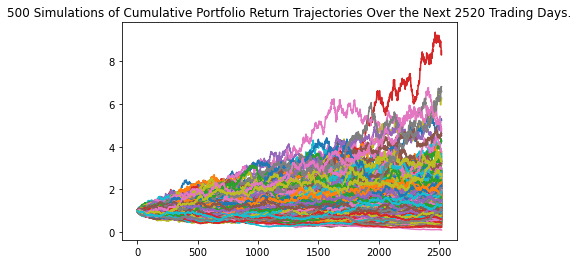

In [38]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

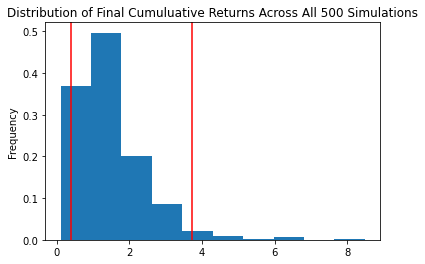

In [39]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              1.499829
std               0.974757
min               0.108797
25%               0.832050
50%               1.275683
75%               1.894593
max               8.484189
95% CI Lower      0.384560
95% CI Upper      3.728373
Name: 2520, dtype: float64


In [41]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $23073.6 and $223702.38
